# About this file

Code done in this file three experiments 4.1, 4.2 and 4.5 which are

1. Finding the cluster of the team of the basis of different zones and game location.

2. It also containg the NN which will find the cluster of a team

# Importing libraries

In [1]:
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import io
import pandas as pd
import random
import numpy as np
import datetime

from pitchplotter.plotter import Plotter
from sklearn.cluster import KMeans
from keras.models import load_model

# 1. Reading file

In [2]:
file_name = "E:\\MS DA\\Major Project Nuig\\complete_zones_counts.csv"
zone_details = pd.read_csv(file_name)
zone_details.head()

,team_a_zone_1_count,team_a_zone_2_count,team_a_zone_3_count,team_a_zone_4_count,team_a_zone_5_count,team_a_zone_6_count,team_a_zone_7_count,team_a_zone_8_count,team_a_zone_9_count,team_b_zone_1_count,...,team_b_zone_3_count,team_b_zone_4_count,team_b_zone_5_count,team_b_zone_6_count,team_b_zone_7_count,team_b_zone_8_count,team_b_zone_9_count,match_id,teama,teamb
0,1580,1500,1999,3736,2596,4196,1483,882,1228,3732,...,1927,5115,1932,4092,1090,1272,1557,987592,Bournemouth,Cardiff City
1,2493,2177,1747,1095,934,1970,1052,581,438,1643,...,2683,4325,3729,4279,2535,4132,2499,987593,Arsenal,Manchester City
2,1520,1058,1151,4008,3713,3684,1493,2556,1287,1018,...,960,1816,2622,3022,1445,4238,2906,987594,Fulham,Crystal Palace
3,958,653,1245,1397,1527,1808,2049,3871,1464,1787,...,987,3878,4309,4407,2851,5955,3840,987595,Huddersfield Town,Chelsea
4,1510,1942,1752,3270,3211,3938,1275,1877,1869,382,...,1206,2211,3448,2942,2407,6293,2509,987596,Liverpool,West Ham United
5,964,1666,1440,2235,1849,3910,162,1035,1244,661,...,1861,4204,2792,4338,3119,3930,1211,987597,Manchester United,Leicester City
6,658,1063,621,1812,2009,2127,1047,1460,1329,2807,...,1833,5704,5012,5469,1528,2974,2248,987598,Newcastle United,Tottenham Hotspur
7,837,704,739,2080,1403,2021,723,1233,1420,2601,...,2869,3433,2718,4520,909,5097,1806,987599,Southampton,Burnley
8,1910,1596,1027,2735,2073,2681,1210,1533,1331,717,...,1486,2883,2992,3141,2981,5660,4132,987600,Watford,Brighton and Hove Albion
9,775,592,682,2678,1901,2835,962,2252,1115,592,...,1918,4175,5244,3505,1177,5706,2856,987601,Wolverhampton Wanderers,Everton


# 2. Data Processing

In [3]:
#Separating the home and away team data
home_teams_details = zone_details[["match_id" ,"team_a_zone_1_count", "team_a_zone_2_count", "team_a_zone_3_count", "team_a_zone_4_count", "team_a_zone_5_count", "team_a_zone_6_count", "team_a_zone_7_count", "team_a_zone_8_count", "team_a_zone_9_count", "teama"]]
away_teams_details = zone_details[["match_id" ,"team_b_zone_1_count", "team_b_zone_2_count", "team_b_zone_3_count", "team_b_zone_4_count", "team_b_zone_5_count", "team_b_zone_6_count", "team_b_zone_7_count", "team_b_zone_8_count", "team_b_zone_9_count", "teamb"]]

In [4]:
home_teams_details.head()

,match_id,team_a_zone_1_count,team_a_zone_2_count,team_a_zone_3_count,team_a_zone_4_count,team_a_zone_5_count,team_a_zone_6_count,team_a_zone_7_count,team_a_zone_8_count,team_a_zone_9_count,teama
0,987592,1580,1500,1999,3736,2596,4196,1483,882,1228,Bournemouth
1,987593,2493,2177,1747,1095,934,1970,1052,581,438,Arsenal
2,987594,1520,1058,1151,4008,3713,3684,1493,2556,1287,Fulham
3,987595,958,653,1245,1397,1527,1808,2049,3871,1464,Huddersfield Town
4,987596,1510,1942,1752,3270,3211,3938,1275,1877,1869,Liverpool


## 2.1. Grouping the teams details and converting into percentage data

In [5]:
#Finding Similar teams on the basis of Zones Count
#Calculating the aggeregate of the ball possession for home team
grouped_9_home_matches_sum = home_teams_details.groupby("teama").agg(
    {
        "team_a_zone_1_count": sum,
        "team_a_zone_2_count": sum,
        "team_a_zone_3_count": sum,
        "team_a_zone_4_count": sum,
        "team_a_zone_5_count": sum,
        "team_a_zone_6_count": sum,
        "team_a_zone_7_count": sum,
        "team_a_zone_8_count": sum,
        "team_a_zone_9_count": sum
    })

grouped_9_home_matches_sum["total"] = (grouped_9_home_matches_sum["team_a_zone_1_count"] + grouped_9_home_matches_sum["team_a_zone_2_count"] + grouped_9_home_matches_sum["team_a_zone_3_count"] + grouped_9_home_matches_sum["team_a_zone_4_count"] + grouped_9_home_matches_sum["team_a_zone_5_count"] + grouped_9_home_matches_sum["team_a_zone_6_count"] + grouped_9_home_matches_sum["team_a_zone_7_count"] + grouped_9_home_matches_sum["team_a_zone_8_count"] + grouped_9_home_matches_sum["team_a_zone_9_count"])

In [6]:
#Converting data into prercentage for home team

percentage_grouped_9_home_matches_sum = pd.DataFrame()
percentage_grouped_9_home_matches_sum["team_a_zone_1_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_1_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_2_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_2_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_3_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_3_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_4_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_4_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_5_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_5_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_6_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_6_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_7_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_7_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_8_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_8_count"]/grouped_9_home_matches_sum["total"])
percentage_grouped_9_home_matches_sum["team_a_zone_9_count"] = round(100*grouped_9_home_matches_sum["team_a_zone_9_count"]/grouped_9_home_matches_sum["total"])

In [7]:
#Calculating the aggeregate of the ball possession for away team
grouped_9_away_matches_sum = away_teams_details.groupby("teamb").agg(
    {
        "team_b_zone_1_count": sum,
        "team_b_zone_2_count": sum,
        "team_b_zone_3_count": sum,
        "team_b_zone_4_count": sum,
        "team_b_zone_5_count": sum,
        "team_b_zone_6_count": sum,
        "team_b_zone_7_count": sum,
        "team_b_zone_8_count": sum,
        "team_b_zone_9_count": sum
    })

grouped_9_away_matches_sum["total"] = (grouped_9_away_matches_sum["team_b_zone_1_count"] + grouped_9_away_matches_sum["team_b_zone_2_count"] + grouped_9_away_matches_sum["team_b_zone_3_count"] + grouped_9_away_matches_sum["team_b_zone_4_count"] + grouped_9_away_matches_sum["team_b_zone_5_count"] + grouped_9_away_matches_sum["team_b_zone_6_count"] + grouped_9_away_matches_sum["team_b_zone_7_count"] + grouped_9_away_matches_sum["team_b_zone_8_count"] + grouped_9_away_matches_sum["team_b_zone_9_count"])

In [8]:
#Converting the data into prercentage for away team

percentage_grouped_9_away_matches_sum = pd.DataFrame()
percentage_grouped_9_away_matches_sum["team_b_zone_1_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_1_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_2_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_2_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_3_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_3_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_4_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_4_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_5_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_5_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_6_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_6_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_7_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_7_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_8_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_8_count"]/grouped_9_away_matches_sum["total"])
percentage_grouped_9_away_matches_sum["team_b_zone_9_count"] = round(100*grouped_9_away_matches_sum["team_b_zone_9_count"]/grouped_9_away_matches_sum["total"])

In [9]:
percentage_grouped_9_home_matches_sum.head()

,team_a_zone_1_count,team_a_zone_2_count,team_a_zone_3_count,team_a_zone_4_count,team_a_zone_5_count,team_a_zone_6_count,team_a_zone_7_count,team_a_zone_8_count,team_a_zone_9_count
teama,,,,,,,,,
Arsenal,11.0,13.0,9.0,16.0,14.0,19.0,6.0,5.0,7.0
Bournemouth,10.0,13.0,10.0,17.0,13.0,15.0,8.0,8.0,6.0
Brighton and Hove Albion,12.0,17.0,11.0,15.0,11.0,15.0,7.0,6.0,6.0
Burnley,8.0,15.0,8.0,14.0,15.0,21.0,7.0,7.0,5.0
Cardiff City,12.0,15.0,8.0,16.0,12.0,11.0,8.0,9.0,9.0


In [10]:
percentage_grouped_9_away_matches_sum.head()

,team_b_zone_1_count,team_b_zone_2_count,team_b_zone_3_count,team_b_zone_4_count,team_b_zone_5_count,team_b_zone_6_count,team_b_zone_7_count,team_b_zone_8_count,team_b_zone_9_count
teamb,,,,,,,,,
Arsenal,9.0,15.0,8.0,14.0,14.0,14.0,7.0,12.0,7.0
Bournemouth,8.0,15.0,9.0,14.0,14.0,13.0,7.0,13.0,8.0
Brighton and Hove Albion,9.0,13.0,9.0,12.0,10.0,18.0,8.0,12.0,8.0
Burnley,10.0,16.0,9.0,13.0,12.0,14.0,6.0,14.0,7.0
Cardiff City,10.0,16.0,11.0,12.0,9.0,12.0,8.0,13.0,8.0


# 2.2. Data processing for 3 areas

## For Home Teams

In [11]:
home_teams_6_data = pd.DataFrame()
home_teams_6_details = []

#Converting 9 zone data into 3 area for home team. Saving it into data frame.
for i in home_teams_details.iterrows():
    home_teams_6_details.append([i[1].match_id, i[1].team_a_zone_1_count + i[1].team_a_zone_2_count + i[1].team_a_zone_3_count, i[1].team_a_zone_4_count + i[1].team_a_zone_5_count + i[1].team_a_zone_6_count, i[1].team_a_zone_7_count + i[1].team_a_zone_8_count + i[1].team_a_zone_9_count, i[1].teama])
    tmp = pd.DataFrame(home_teams_6_details, columns = ["match_id", "team_a_defence", "team_a_midfield", "team_a_attack", "teama"])
    home_teams_6_data = pd.DataFrame.append(home_teams_6_data, tmp)
    
home_teams_6_data = home_teams_6_data.drop_duplicates()

In [12]:
away_teams_6_data = pd.DataFrame()
away_teams_6_details = []

#Converting 9 zone data into 3 area for away team. Saving it into data frame.
for i in away_teams_details.iterrows():
    away_teams_6_details.append([i[1].match_id, i[1].team_b_zone_1_count + i[1].team_b_zone_2_count + i[1].team_b_zone_3_count, i[1].team_b_zone_4_count + i[1].team_b_zone_5_count + i[1].team_b_zone_6_count, i[1].team_b_zone_7_count + i[1].team_b_zone_8_count + i[1].team_b_zone_9_count, i[1].teamb])
    tmp = pd.DataFrame(away_teams_6_details, columns = ["match_id", "team_b_defence", "team_b_midfield", "team_b_attack", "teamb"])
    away_teams_6_data = pd.DataFrame.append(away_teams_6_data, tmp)

away_teams_6_data = away_teams_6_data.drop_duplicates()

In [13]:
len(away_teams_6_data)

210

In [14]:
#Calculating the aggeregate of the 3 areas of ball possession for away team.
grouped_home_matches_sum = home_teams_6_data.groupby("teama").agg(
    {
         'team_a_defence':sum,
         'team_a_midfield': sum,
         'team_a_attack': sum
    })

grouped_home_matches_sum["total"] = (grouped_home_matches_sum["team_a_defence"] + grouped_home_matches_sum ["team_a_midfield"] + grouped_home_matches_sum["team_a_attack"])

In [15]:
grouped_home_matches_sum.head()

,team_a_defence,team_a_midfield,team_a_attack,total
teama,,,,
Arsenal,65668,97568,35033,198269
Bournemouth,51466,69508,35318,156292
Brighton and Hove Albion,46991,49148,22996,119135
Burnley,42549,69080,26521,138150
Cardiff City,42664,48290,31132,122086


In [16]:
# Data In Percentage
percentage_grouped_3_home_matches_sum = pd.DataFrame()
percentage_grouped_3_home_matches_sum["team_a_defence"] = round(100*grouped_home_matches_sum["team_a_defence"]/grouped_home_matches_sum["total"], 2)
percentage_grouped_3_home_matches_sum["team_a_midfield"] = round(100*grouped_home_matches_sum["team_a_midfield"]/grouped_home_matches_sum["total"], 2)
percentage_grouped_3_home_matches_sum["team_a_attack"] = round(100*grouped_home_matches_sum["team_a_attack"]/grouped_home_matches_sum["total"], 2)

## For Away teams

In [17]:
#Calculating the aggeregate of the 3 areas of ball possession for away team
grouped_away_matches_sum = away_teams_6_data.groupby("teamb").agg(
    {
         'team_b_defence':sum,
         'team_b_midfield': sum,
         'team_b_attack': sum
    })

grouped_away_matches_sum["total"] = (grouped_away_matches_sum["team_b_defence"] + grouped_away_matches_sum ["team_b_midfield"] + grouped_away_matches_sum["team_b_attack"])
# away_teams_6_data.sort_values(by = "teamb")

In [18]:
#Converting the data into percentage
percentage_grouped_3_away_matches_sum = pd.DataFrame()
percentage_grouped_3_away_matches_sum["team_b_defence"] = round(100*grouped_away_matches_sum["team_b_defence"]/grouped_away_matches_sum["total"], 2)
percentage_grouped_3_away_matches_sum["team_b_midfield"] = round(100*grouped_away_matches_sum["team_b_midfield"]/grouped_away_matches_sum["total"], 2)
percentage_grouped_3_away_matches_sum["team_b_attack"] = round(100*grouped_away_matches_sum["team_b_attack"]/grouped_away_matches_sum["total"], 2)

In [19]:
percentage_grouped_3_home_matches_sum.sort_values(by = ["team_a_defence", "team_a_midfield","team_a_attack"]).head()

,team_a_defence,team_a_midfield,team_a_attack
teama,,,
Wolverhampton Wanderers,17.91,49.11,32.98
Manchester City,19.07,55.93,25.00
Southampton,19.47,49.63,30.90
Chelsea,20.03,53.86,26.11
Everton,20.69,51.57,27.74


In [20]:
percentage_grouped_3_away_matches_sum.sort_values(by = ["team_b_defence", "team_b_midfield","team_b_attack"]).head()

,team_b_defence,team_b_midfield,team_b_attack
teamb,,,
Manchester City,26.37,43.83,29.79
Chelsea,28.15,44.59,27.26
Southampton,28.73,43.86,27.41
Leicester City,28.90,40.13,30.98
Tottenham Hotspur,29.29,45.33,25.38


In [21]:
home_teams_6_data.groupby("teama").std().round(2)[["team_a_defence","team_a_midfield","team_a_attack"]].head()

,team_a_defence,team_a_midfield,team_a_attack
teama,,,
Arsenal,1017.76,2990.11,755.83
Bournemouth,1600.88,1809.89,982.79
Brighton and Hove Albion,1323.15,1530.27,892.62
Burnley,944.00,2987.14,856.10
Cardiff City,849.53,1464.62,1147.54


In [22]:
away_teams_6_data.groupby("teamb").std().round(2)[["team_b_defence","team_b_midfield","team_b_attack"]].head()

,team_b_defence,team_b_midfield,team_b_attack
teamb,,,
Arsenal,2846.05,2892.58,2013.65
Bournemouth,1598.46,3608.77,2617.57
Brighton and Hove Albion,3822.48,4150.36,4090.53
Burnley,2838.88,1968.58,2827.63
Cardiff City,2459.75,2128.31,3224.70


# 3. Clustering similar teams

## 3.1. For 3 Areas

### Home teams

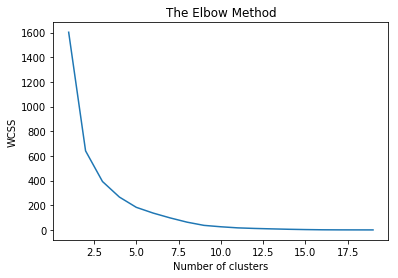

In [27]:
X11 = percentage_grouped_3_home_matches_sum.reindex(['Manchester City','Liverpool','Chelsea','Tottenham Hotspur','Arsenal','Manchester United','Wolverhampton Wanderers','Everton','Leicester City','West Ham United','Watford','Crystal Palace','Newcastle United','Bournemouth','Burnley','Southampton','Brighton and Hove Albion','Cardiff City','Fulham','Huddersfield Town']).reset_index()

#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(X11.iloc[:,1:].values)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
X11.head()

,teama,team_a_defence,team_a_midfield,team_a_attack
0,Manchester City,19.07,55.93,25.00
1,Liverpool,23.89,55.96,20.16
2,Chelsea,20.03,53.86,26.11
3,Tottenham Hotspur,32.13,48.33,19.53
4,Arsenal,33.12,49.21,17.67


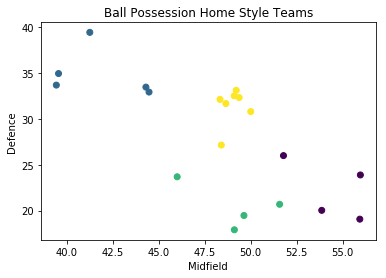

In [29]:
y_pred = KMeans(n_clusters=4, random_state=25).fit_predict(X11.iloc[:,1:].values)
plt.figure()
plt.scatter(X11.iloc[:, 2], X11.iloc[:, 1], c=y_pred)
plt.title("Ball Possession Home Style Teams")
plt.xlabel('Midfield')
plt.ylabel('Defence')
# plt.legend()
plt.show()

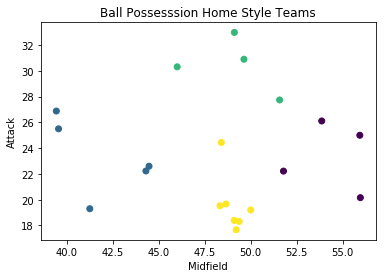

In [30]:
plt.figure()
plt.scatter(X11.iloc[:, 2], X11.iloc[:, 3], c=y_pred)
plt.xlabel('Midfield')
plt.ylabel('Attack')
# plt.legend()
plt.title("Ball Possesssion Home Style Teams")
plt.show()

In [31]:
X11["cluster_no"] = y_pred

In [32]:
#Adding cluster number to DataFrame
for i in range(len(X11.groupby("cluster_no"))):
    print("Group ", i, " : ", list(X11.groupby("cluster_no").get_group(i)["teama"]))

Group  0  :  ['Manchester City', 'Liverpool', 'Chelsea', 'Manchester United']
Group  1  :  ['Crystal Palace', 'Bournemouth', 'Brighton and Hove Albion', 'Cardiff City', 'Huddersfield Town']
Group  2  :  ['Wolverhampton Wanderers', 'Everton', 'Newcastle United', 'Southampton']
Group  3  :  ['Tottenham Hotspur', 'Arsenal', 'Leicester City', 'West Ham United', 'Watford', 'Burnley', 'Fulham']


In [33]:
X11.head()

,teama,team_a_defence,team_a_midfield,team_a_attack,cluster_no
0,Manchester City,19.07,55.93,25.00,0
1,Liverpool,23.89,55.96,20.16,0
2,Chelsea,20.03,53.86,26.11,0
3,Tottenham Hotspur,32.13,48.33,19.53,3
4,Arsenal,33.12,49.21,17.67,3


### Away teams

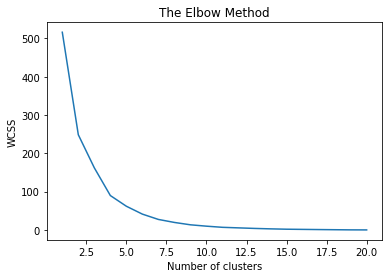

In [34]:
X12 = percentage_grouped_3_away_matches_sum.reindex(['Manchester City','Liverpool','Chelsea','Tottenham Hotspur','Arsenal','Manchester United','Wolverhampton Wanderers','Everton','Leicester City','West Ham United','Watford','Crystal Palace','Newcastle United','Bournemouth','Burnley','Southampton','Brighton and Hove Albion','Cardiff City','Fulham','Huddersfield Town']).reset_index()

#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss12 = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(X12.iloc[:,1:].values)
    wcss12.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss12)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

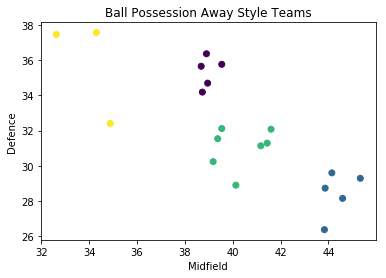

In [35]:
y_pred12 = KMeans(n_clusters=4, random_state=25).fit_predict(X12.iloc[:,1:].values)
plt.figure()
plt.scatter(X12.iloc[:, 2], X12.iloc[:, 1], c=y_pred12)
plt.title("Ball Possession Away Style Teams")
plt.xlabel('Midfield')
plt.ylabel('Defence')
# plt.legend()
plt.show()

In [36]:
#Adding cluster number to DataFrame
X12["cluster_no"] = y_pred12
for i in range(len(X12.groupby("cluster_no"))):
    print("Group ", i, " : ", list(X12.groupby("cluster_no").get_group(i)["teamb"]))

Group  0  :  ['Wolverhampton Wanderers', 'Crystal Palace', 'Burnley', 'Fulham', 'Huddersfield Town']
Group  1  :  ['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham Hotspur', 'Southampton']
Group  2  :  ['Arsenal', 'Manchester United', 'Leicester City', 'West Ham United', 'Watford', 'Bournemouth', 'Brighton and Hove Albion']
Group  3  :  ['Everton', 'Newcastle United', 'Cardiff City']


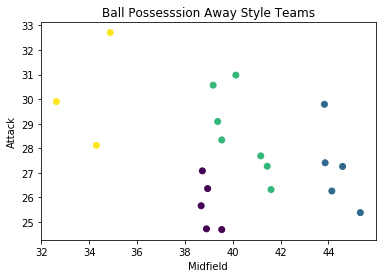

In [37]:
plt.figure()
plt.scatter(X12.iloc[:, 2], X12.iloc[:, 3], c=y_pred12)
plt.xlabel('Midfield')
plt.ylabel('Attack')
# plt.legend()
plt.title("Ball Possesssion Away Style Teams")
plt.show()

In [38]:
X12.head()

,teamb,team_b_defence,team_b_midfield,team_b_attack,cluster_no
0,Manchester City,26.37,43.83,29.79,1
1,Liverpool,29.60,44.14,26.26,1
2,Chelsea,28.15,44.59,27.26,1
3,Tottenham Hotspur,29.29,45.33,25.38,1
4,Arsenal,32.08,41.60,26.32,2


## 3.2. 9 zones

### Home Teams

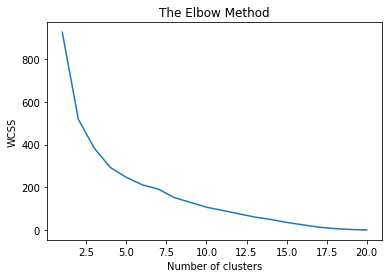

In [39]:
X21 = percentage_grouped_9_home_matches_sum.reindex(['Manchester City','Liverpool','Chelsea','Tottenham Hotspur','Arsenal','Manchester United','Wolverhampton Wanderers','Everton','Leicester City','West Ham United','Watford','Crystal Palace','Newcastle United','Bournemouth','Burnley','Southampton','Brighton and Hove Albion','Cardiff City','Fulham','Huddersfield Town']).reset_index()

#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss21 = []
for i in range(1, 21):
    kmeans21 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans21.fit(X21.iloc[:,1:].values)
    wcss21.append(kmeans21.inertia_)
plt.plot(range(1, 21), wcss21)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

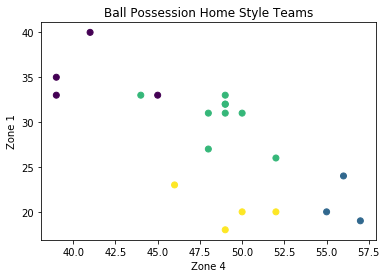

In [40]:
y_pred21 = KMeans(n_clusters=4, random_state=25).fit_predict(X21.iloc[:,1:].values)
plt.figure()
plt.scatter(X21.iloc[:, 4] + X21.iloc[:, 5] + X21.iloc[:, 6], X21.iloc[:, 1] + X21.iloc[:, 2] + X21.iloc[:, 3], c=y_pred21)
plt.title("Ball Possession Home Style Teams")
plt.xlabel('Zone 4')
plt.ylabel('Zone 1')
# plt.legend()
plt.show()

In [41]:
#Adding cluster number to DataFrame
X21["cluster_no"] = y_pred21
for i in range(len(X21.groupby("cluster_no"))):
    print("Group ", i, " : ", list(X21.groupby("cluster_no").get_group(i)["teama"]))

Group  0  :  ['Bournemouth', 'Brighton and Hove Albion', 'Cardiff City', 'Huddersfield Town']
Group  1  :  ['Manchester City', 'Liverpool', 'Chelsea']
Group  2  :  ['Tottenham Hotspur', 'Arsenal', 'Manchester United', 'Leicester City', 'West Ham United', 'Watford', 'Crystal Palace', 'Burnley', 'Fulham']
Group  3  :  ['Wolverhampton Wanderers', 'Everton', 'Newcastle United', 'Southampton']


In [42]:
X21.head()

,teama,team_a_zone_1_count,team_a_zone_2_count,team_a_zone_3_count,team_a_zone_4_count,team_a_zone_5_count,team_a_zone_6_count,team_a_zone_7_count,team_a_zone_8_count,team_a_zone_9_count,cluster_no
0,Manchester City,6.0,8.0,5.0,17.0,19.0,21.0,8.0,7.0,10.0,1
1,Liverpool,8.0,9.0,7.0,20.0,16.0,20.0,7.0,7.0,6.0,1
2,Chelsea,8.0,5.0,7.0,18.0,19.0,18.0,7.0,10.0,8.0,1
3,Tottenham Hotspur,10.0,12.0,9.0,16.0,15.0,18.0,6.0,6.0,7.0,2
4,Arsenal,11.0,13.0,9.0,16.0,14.0,19.0,6.0,5.0,7.0,2


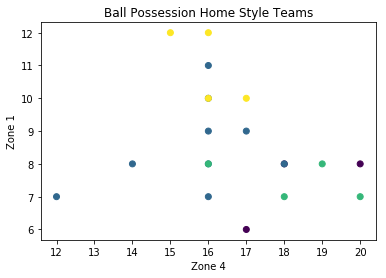

In [43]:
y_pred21 = KMeans(n_clusters=4, random_state=25).fit_predict(X21.iloc[:,1:].values)
plt.figure()
plt.scatter(X21.iloc[:, 4] , X21.iloc[:, 1], c=y_pred21)
plt.title("Ball Possession Home Style Teams")
plt.xlabel('Zone 4')
plt.ylabel('Zone 1')
# plt.legend()
plt.show()

### Away Teams

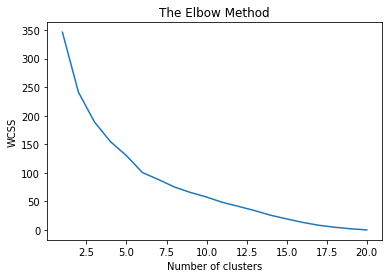

In [44]:
X22 = percentage_grouped_9_away_matches_sum.reindex(['Manchester City','Liverpool','Chelsea','Tottenham Hotspur','Arsenal','Manchester United','Wolverhampton Wanderers','Everton','Leicester City','West Ham United','Watford','Crystal Palace','Newcastle United','Bournemouth','Burnley','Southampton','Brighton and Hove Albion','Cardiff City','Fulham','Huddersfield Town']).reset_index()

#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss22 = []
for i in range(1, 21):
    kmeans22 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans22.fit(X22.iloc[:,1:].values)
    wcss22.append(kmeans22.inertia_)
plt.plot(range(1, 21), wcss22)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

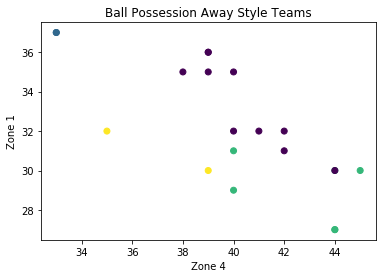

In [45]:
y_pred22 = KMeans(n_clusters=4, random_state=25).fit_predict(X22.iloc[:,1:].values)
plt.figure()
plt.scatter(X22.iloc[:, 4] + X22.iloc[:, 5] + X22.iloc[:, 6], X22.iloc[:, 1] + X22.iloc[:, 2] + X22.iloc[:, 3], c=y_pred22)
plt.title("Ball Possession Away Style Teams")
plt.xlabel('Zone 4')
plt.ylabel('Zone 1')
# plt.legend()
plt.show()

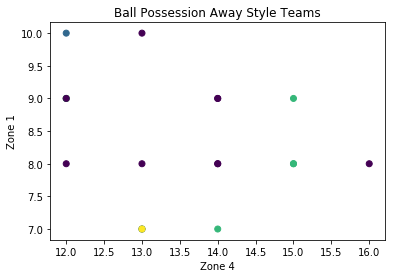

In [46]:
plt.figure()
plt.scatter(X22.iloc[:, 4], X22.iloc[:, 1], c=y_pred22)
plt.title("Ball Possession Away Style Teams")
plt.xlabel('Zone 4')
plt.ylabel('Zone 1')
# plt.legend()
plt.show()

In [47]:
#Adding cluster number to DataFrame
X22["cluster_no"] = y_pred22
for i in range(len(X22.groupby("cluster_no"))):
    print("Group ", i, " : ", list(X22.groupby("cluster_no").get_group(i)["teamb"]))

Group  0  :  ['Arsenal', 'Manchester United', 'Wolverhampton Wanderers', 'Watford', 'Crystal Palace', 'Bournemouth', 'Burnley', 'Southampton', 'Fulham', 'Huddersfield Town']
Group  1  :  ['Newcastle United', 'Cardiff City']
Group  2  :  ['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham Hotspur', 'Leicester City', 'Brighton and Hove Albion']
Group  3  :  ['Everton', 'West Ham United']


# 4. Neural Network For Finding Clusters

In [48]:
from keras.models import Model, Sequential
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten, Input
from keras.utils import plot_model
import keras
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## 4.1. For 3 areas

### For Home Teams

In [49]:
#Merging the data
x_data_1 = pd.merge(home_teams_6_data, X21[["teama", "cluster_no"]], on='teama', how='outer')

In [82]:
#Diving the test and train data
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(x_data_1[x_data_1.columns.tolist()[1:-2]], x_data_1["cluster_no"], test_size=0.1, random_state=110)

In [73]:
#Initalising the Model
Input_6= Input(shape=(3, ))

x_6 = Dense(12, activation='tanh')(Input_6)
x_6 = Dropout(0.4)(x_6)
x_6 = Dense(10, activation='tanh')(x_6)
x_6 = Dropout(0.4)(x_6)
out_6_1 = Dense(4,  activation='sigmoid')(x_6)

model_6 = Model(inputs=Input_6, outputs=out_6_1)
model_6.compile(optimizer = "rmsprop", loss = 'mse', metrics=['accuracy'])
model_6.summary()

# model_6.load_weights("final_home_team_3_pitch_model_weights.h5")

In [83]:
#Fitting the Model
model_6_history = model_6.fit(X_train_6, keras.utils.to_categorical(y_train_6, 4), epochs=4, batch_size=None)

Epoch 1/4
189/189 [==============================] - 0s 106us/step - loss: 0.2092 - acc: 0.3386
Epoch 2/4
189/189 [==============================] - 0s 97us/step - loss: 0.2118 - acc: 0.2646
Epoch 3/4
189/189 [==============================] - 0s 83us/step - loss: 0.2136 - acc: 0.2804
Epoch 4/4
189/189 [==============================] - 0s 88us/step - loss: 0.2016 - acc: 0.3122


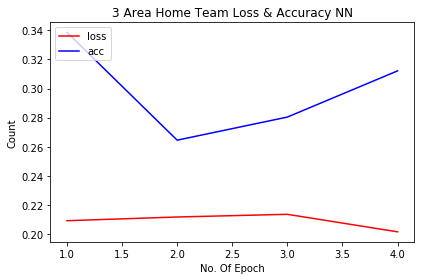

In [84]:
#Checking the performance of the model
import matplotlib.pyplot as plt

plt.plot(range(1,5),model_6_history.history['loss'], 'r')
plt.plot(range(1,5), model_6_history.history['acc'], 'b')
plt.title('3 Area Home Team Loss & Accuracy NN')

plt.ylabel('Count')
plt.xlabel('No. Of Epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.tight_layout()

# plt.savefig("E:\\MS DA\\Major Project Nuig\\NN_3_loss_acc_plot_2.png")

In [85]:
# Evaluating the Model
model_6.evaluate(X_test_6, keras.utils.to_categorical(y_test_6, 4), batch_size=None)

21/21 [==============================] - 0s 0us/step


[0.17330019176006317, 0.523809552192688]

### Confusion matrix for home team

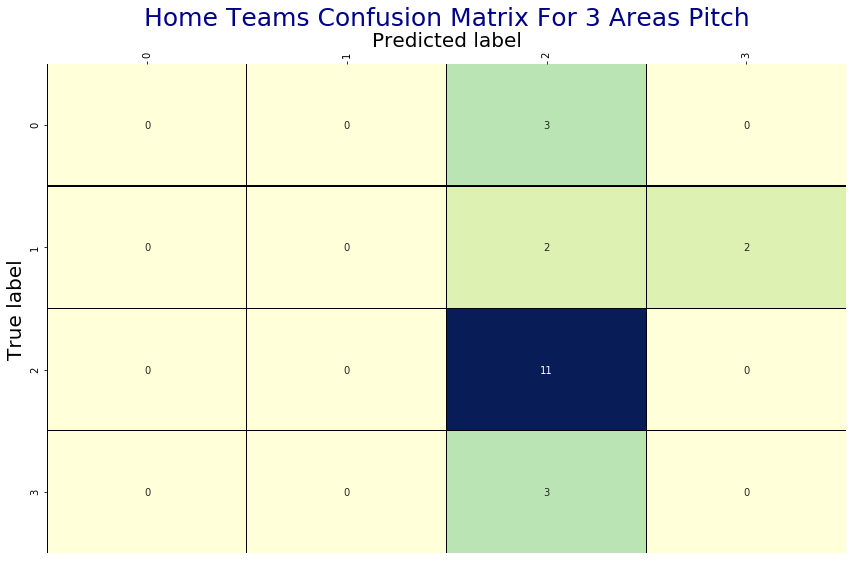

In [86]:
y_pred = model_6.predict(X_test_6)
y_true_18 = y_test_6.values
y_pred_18 = y_pred.argmax(1)

cm = confusion_matrix(y_true_18, y_pred_18) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = (set(x_data_1["cluster_no"])), columns = (set(x_data_1["cluster_no"])))

plt.figure(figsize=(12,10))
ax_18 = sns.heatmap(cm_df, annot=True, cmap="YlGnBu", linewidths=.1, linecolor="black", cbar=False)
# coolwarm
ax_18.xaxis.tick_top()
ax_18.xaxis.set_label_position('top')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.xticks(rotation=90)
plt.title("Home Teams Confusion Matrix For 3 Areas Pitch", fontsize=25, color='darkblue')
# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=0.70)
# plt.savefig("E:\\MS DA\\Major Project Nuig\\NN_3_similar_confusion_matrix_4.png", facecolor='w', edgecolor='w',orientation='portrait')

# 4.2. For 9 Zones

## For Home Teams

In [63]:
x_data = pd.merge(home_teams_details, X21[["teama", "cluster_no"]], on='teama', how='outer')

In [483]:
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(x_data[x_data.columns.tolist()[1:-2]], x_data["cluster_no"], test_size=0.1)

In [498]:
Input_9= Input(shape=(9, ))

x_9 = Dense(16, activation='tanh')(Input_9)
x_9 = Dropout(0.5)(x_9)
x_9 = Dense(12, activation='tanh')(x_9)
x_9 = Dropout(0.4)(x_9)

out_9_1 = Dense(4,  activation='sigmoid')(x_9)

model_9 = Model(inputs=Input_9, outputs=out_9_1)
model_9.compile(optimizer = "rmsprop", loss = 'mse', metrics=['accuracy'])
model_9.summary()

# model_9.load_weights("final_home_team_9_pitch_model_weights.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 9)                 0         
_________________________________________________________________
dense_112 (Dense)            (None, 16)                160       
_________________________________________________________________
dropout_75 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 12)                204       
_________________________________________________________________
dropout_76 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 4)                 52        
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [502]:
model_9_history = model_9.fit(X_train_9, keras.utils.to_categorical(y_train_9, 4), epochs=6, batch_size=None)

Epoch 1/6
189/189 [==============================] - 0s 124us/step - loss: 0.2280 - acc: 0.3069
Epoch 2/6
189/189 [==============================] - 0s 118us/step - loss: 0.2237 - acc: 0.3016
Epoch 3/6
189/189 [==============================] - 0s 127us/step - loss: 0.2304 - acc: 0.2857
Epoch 4/6
189/189 [==============================] - 0s 147us/step - loss: 0.2232 - acc: 0.2910
Epoch 5/6
189/189 [==============================] - 0s 147us/step - loss: 0.2203 - acc: 0.3016
Epoch 6/6
189/189 [==============================] - 0s 151us/step - loss: 0.2199 - acc: 0.3439


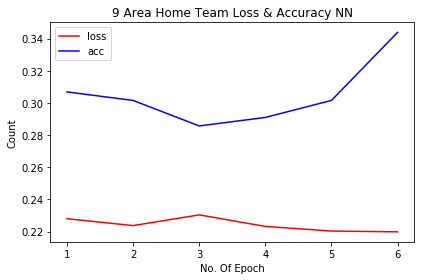

In [504]:
plt.plot(range(1,7),model_9_history.history['loss'], 'r')
plt.plot(range(1,7), model_9_history.history['acc'], 'b')
plt.title('9 Area Home Team Loss & Accuracy NN')

plt.ylabel('Count')
plt.xlabel('No. Of Epoch')
plt.legend(['loss', 'acc'], loc='upper left')

plt.tight_layout()
# plt.savefig("E:\\MS DA\\Major Project Nuig\\NN_9_loss_acc_plot.png")

In [513]:
model_9.evaluate(X_test_9, keras.utils.to_categorical(y_test_9, 4), batch_size=None)

21/21 [==============================] - 0s 211us/step
[0.1772187054157257, 0.6082333432674408]


### Confusion Matrix For Home Teams

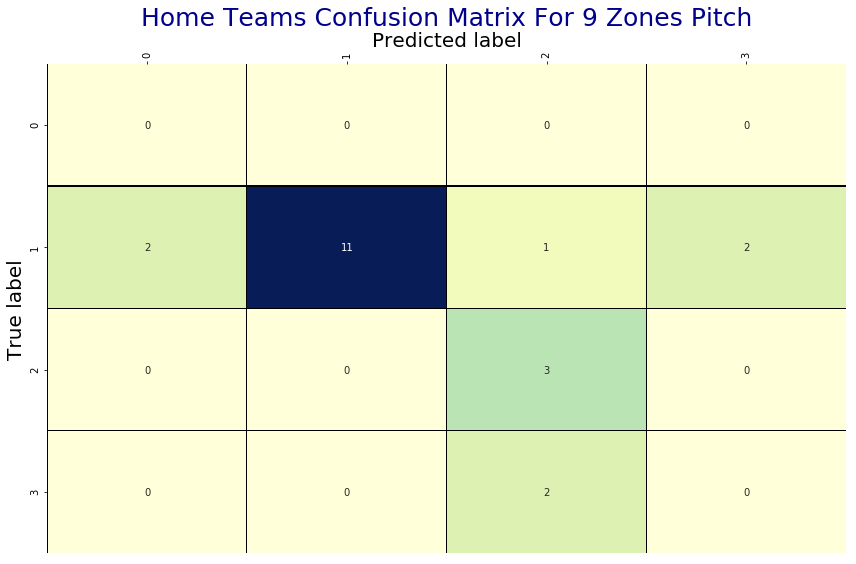

In [517]:
y_pred = model_9.predict(X_test_9)
y_true_18 = y_test_9.values
y_pred_18 = y_pred.argmax(1)

cm = confusion_matrix(y_true_18, y_pred_18) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = (set(x_data["cluster_no"])), columns = (set(x_data["cluster_no"])))

plt.figure(figsize=(12,10))
ax_18 = sns.heatmap(cm_df, annot=True, cmap="YlGnBu", linewidths=.1, linecolor="black", cbar=False)
# coolwarm
ax_18.xaxis.tick_top()
ax_18.xaxis.set_label_position('top')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.xticks(rotation=90)
plt.title("Home Teams Confusion Matrix For 9 Zones Pitch", fontsize=25, color='darkblue')

plt.tight_layout()
plt.subplots_adjust(top=0.70)
# plt.savefig("E:\\MS DA\\Major Project Nuig\\NN_9_similar_confusion_matrix_3.png", facecolor='w', edgecolor='w',orientation='portrait')

In [518]:
# model_9.save_weights('home_team_9_pitch_model_weights.h5')
# model_6.save_weights('weights_home_team_3_pitch_model_weights.h5')
# model_9.save('final_home_team_9_pitch_model_weights.h5')
# model_6.save('final_home_team_3_pitch_model_weights.h5')